In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [168]:
df = pd.read_csv(r"C:\\Users\\doguy\\Desktop\\TurkeyEarth\\TurkeyEarthquake.csv", encoding= 'unicode_escape',escapechar="\\",engine="python",sep=';')

In [169]:
df=df.drop(index=21)

In [170]:
df.head(25)

,Date,Time,Location,Lat.,Long.,Casualty,Mag.,Focal Depth (km),Fault Mechanism
0,1938,12:59,Kýrþehir,"39,1",34,160,6.6 (Ms),10,Strike-slip
1,1939,02:36,"Dikili,Ýzmir","39,1","26,8",60,6.6 (Ms),10,NaN
2,1939,23:57,Erzincan,"39,77","39,53",32700,7.9 (Ms),20,Strike-slip
3,1942,19:01,"Bigadiç, Balýkesir","39,2","28,2",16,6.1 (Ms),10,NaN
4,1942,14:03,"Erbaa, Tokat","40,87","36,47",3000,7.0 (Ms),10,NaN
5,1943,17:32,"Hendek, Adapazarý","40,6","30,5",336,6.6 (Ms),10,Strike-slip
6,1943,22:24,"Ladik, Samsun","41,05","33,72",4000,7.2 (Ms),10,NaN
7,1944,03:25,"Gerede, Bolu","40,8","32,2",3959,7.3 (Ms),10,Strike-slip
8,1944,04:34,"Ayvalýk, Balýkesir","39,37","26,53",30,6.8 (Ms),40,Normal
9,1949,20:43,"Karlýova, Bingöl","39,54","40,57",450,6.7 (Ms),40,Strike-slip


In [171]:
df["Mag."] = [str(x.strip('(Ms)')) if type(x) == str else x for x in df["Mag."]]
df["Mag."] = [str(x.strip('(Mw)')) if type(x) == str else x for x in df["Mag."]]

In [172]:
df['Casualty'] = df['Casualty'].astype(int)

([<matplotlib.patches.Wedge at 0x162fb2bb9a0>,
 [Text(0.22049940838704912, 1.179567722049464, 'Under 125'),
  Text(-1.0580082142253426, 0.30102926540737196, '125 - 150'),
  Text(-1.095307596265268, 0.10149517014913041, '150 , 175'),
  Text(-1.095307591513935, -0.10149522142417912, '175 - 200'),
  Text(0.11072206672752036, -1.1948810082763834, 'Over 200')],
 [Text(0.12862465489244532, 0.6880811711955206, '44.1 %'),
  Text(-0.5770953895774595, 0.1641977811312938, '2.9 %'),
  Text(-0.5974405070537825, 0.055361001899525676, '2.9 %'),
  Text(-0.5974405044621462, -0.05536102986773406, '2.9 %'),
  Text(0.0645878722577202, -0.6970139214945569, '47.1 %')])

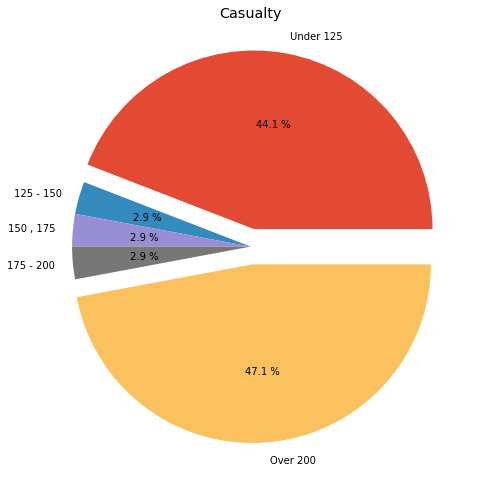

In [173]:
plt.figure(figsize = (8  , 10)) 

light = df.loc[df.Casualty < 125].count()[0]
light_medium = df.loc[(df.Casualty >= 125) & (df.Casualty < 150)].count()[0]
medium = df.loc[(df.Casualty >=150) & (df.Casualty < 175)].count()[0]           
medium_heavy = df.loc[(df.Casualty >= 175 ) & (df.Casualty < 200)].count()[0]
heavy = df.loc[df.Casualty > 200].count()[0] 

labels = ['Under 125' , '125 - 150' , '150 , 175' , '175 - 200' , 'Over 200']
plt.style.use('ggplot')
explode = [.1,0,0,0,.1]
weights = [light , light_medium , medium , medium_heavy , heavy]
plt.title("Casualty")

plt.pie(weights , labels = labels , autopct = '%.1f %%' , explode = explode )


In [174]:
df = df.dropna()

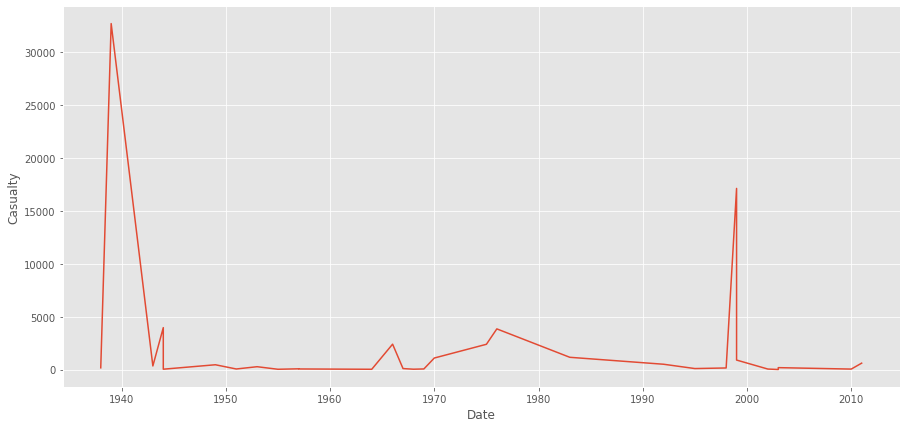

In [175]:
plt.figure(figsize = (15  , 7)) 

xpoints = df.Date
ypoints = df.Casualty
plt.plot(xpoints, ypoints)
plt.xlabel('Date')
plt.ylabel('Casualty')
plt.show()

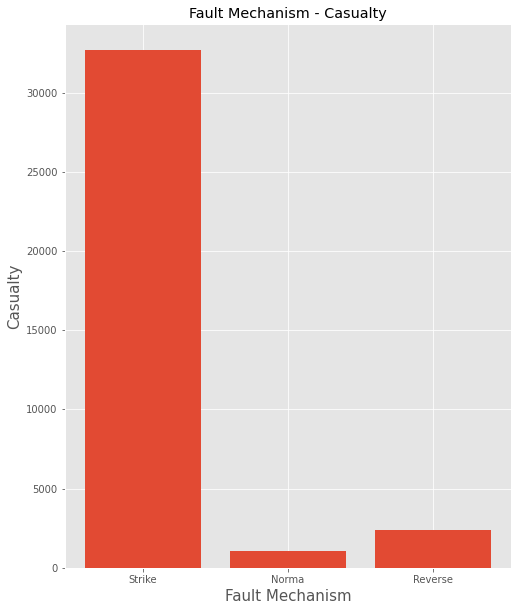

In [220]:
plt.figure(figsize = (8  , 10)) 
blogs = df["Fault Mechanism"]
posts = df["Casualty"]

# Creating a simple bar chart
plt.bar(blogs, posts)

plt.title('Fault Mechanism - Casualty')
plt.xlabel('Fault Mechanism', fontsize=15)
plt.ylabel('Casualty', fontsize=15)
plt.show()

In [178]:
df = df.drop(["Date","Time","Location"], axis = 1)

In [182]:
df.dtypes

Lat.                 object
Long.               float64
Casualty              int32
Mag.                float64
Focal Depth (km)      int64
Fault Mechanism      object
dtype: object

In [ ]:
df["Long."] = df["Long."].str.replace(',','.').astype(float)
df["Mag."] = df["Mag."].str.replace(',','.').astype(float)
df["Fault Mechanism"] = [str(x.strip('-slip')) if type(x) == str else x for x in df["Fault Mechanism"]]

In [188]:
final = Set.drop(["Fault Mechanism","Norma","Reverse","Strike"] , axis = 1)

In [211]:
final.head(15)

,Lat.,Long.,Casualty,Mag.,Focal Depth (km)
2,39,39.53,32700,7.9,20
5,40,30.50,336,6.6,10
7,40,32.20,3959,7.3,10
8,39,26.53,30,6.8,40
9,39,40.57,450,6.7,40
10,40,32.87,50,6.9,10
11,40,27.53,265,7.2,10
12,37,27.05,23,6.8,40
13,36,28.60,67,7.1,80
14,40,31.00,52,7.1,10


In [218]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter = 10000)

X = final.drop('Casualty', axis = 1)
y = final['Casualty']

reg.fit(X , y)
pred = reg.predict([[38,28.40,6.5,4]]) #🗸
score = reg.score(X , y) # %1.0 🗸
print("Succces Rate {}".format(score))
print("Casualty {}".format(pred))

Succces Rate 1.0
Casualty [53]


C:\Users\doguy\Anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [219]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 2 to 34
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Lat.              29 non-null     int32  
 1   Long.             29 non-null     float64
 2   Mag.              29 non-null     float64
 3   Focal Depth (km)  29 non-null     int64  
dtypes: float64(2), int32(1), int64(1)
memory usage: 1.0 KB
